In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("./Position Paris Reims (1).csv")
df

,time_minutes,position_km
0,0.00,1.81
1,7.48,4.62
2,8.21,7.10
3,9.27,8.55
4,10.10,10.43
5,10.41,12.51
6,15.98,14.63
7,17.16,18.33
8,19.08,21.64
9,21.74,24.88


In [48]:
time_t1_list = [30,60,90,120]
intervale = 30

for time in time_t1_list:

    time_t0_index = df[df["time_minutes"] >= (time-intervale)].index[0]
    time_t0 = df.loc[time_t0_index,"time_minutes"]
    
    time_t1_index = df[df["time_minutes"] >= time].index[0]
    time_t1 = df.loc[time_t1_index,"time_minutes"]

    solution = (df.loc[time_t1_index,"position_km"] - df.loc[time_t0_index,"position_km"])/intervale*60

    print(f"Le temps moyen entre {time_t0} minutes et {time_t1} minutes est de {solution.round(2)} km/h")

Le temps moyen entre 0.0 minutes et 30.0 minutes est de 74.32 km/h
Le temps moyen entre 30.0 minutes et 60.0 minutes est de 87.58 km/h
Le temps moyen entre 60.0 minutes et 90.0 minutes est de 65.38 km/h
Le temps moyen entre 90.0 minutes et 120.0 minutes est de 49.1 km/h


In [49]:

for i, row in df.iterrows():

    if i == 0:
        continue

    time_t0_index = i - 1
    time_t0 = df.loc[time_t0_index,"time_minutes"]
    
    time_t1_index = i
    time_t1 = df.loc[time_t1_index,"time_minutes"]

    intervale_minute = time_t1 - time_t0

    solution = (df.loc[time_t1_index,"position_km"] -  df.loc[time_t0_index,"position_km"]) / intervale_minute * 60

    df.loc[i,"vitesse"] = solution

    print(f"Le temps moyen entre {time_t0} minutes et {time_t1} minutes est de {solution.round(3)} km/h")

df.head()

Le temps moyen entre 0.0 minutes et 7.48 minutes est de 22.54 km/h
Le temps moyen entre 7.48 minutes et 8.21 minutes est de 203.836 km/h
Le temps moyen entre 8.21 minutes et 9.27 minutes est de 82.075 km/h
Le temps moyen entre 9.27 minutes et 10.1 minutes est de 135.904 km/h
Le temps moyen entre 10.1 minutes et 10.41 minutes est de 402.581 km/h
Le temps moyen entre 10.41 minutes et 15.98 minutes est de 22.837 km/h
Le temps moyen entre 15.98 minutes et 17.16 minutes est de 188.136 km/h
Le temps moyen entre 17.16 minutes et 19.08 minutes est de 103.438 km/h
Le temps moyen entre 19.08 minutes et 21.74 minutes est de 73.083 km/h
Le temps moyen entre 21.74 minutes et 21.94 minutes est de 438.0 km/h
Le temps moyen entre 21.94 minutes et 22.57 minutes est de 304.762 km/h
Le temps moyen entre 22.57 minutes et 24.67 minutes est de 120.857 km/h
Le temps moyen entre 24.67 minutes et 28.9 minutes est de 31.206 km/h
Le temps moyen entre 28.9 minutes et 30.0 minutes est de 163.636 km/h
Le temps moye

,time_minutes,position_km,vitesse
0,0.00,1.81,NaN
1,7.48,4.62,22.540107
2,8.21,7.10,203.835616
3,9.27,8.55,82.075472
4,10.10,10.43,135.903614


Text(0.5, 1.0, 'évolution de la vitesse dans le temps')

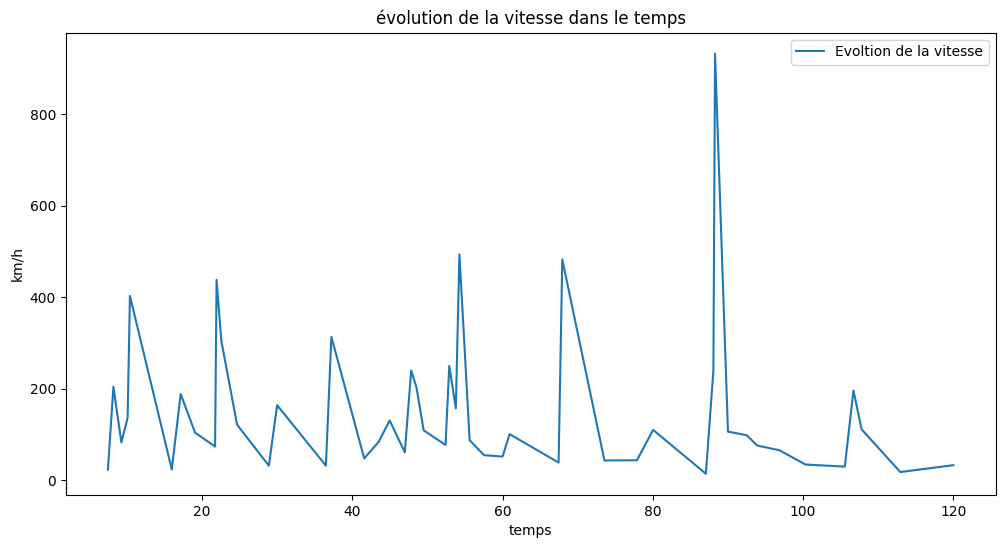

In [50]:
plt.figure(figsize=(12,6))
plt.plot(df["time_minutes"],df["vitesse"])
plt.xlabel("temps")
plt.ylabel("km/h")
plt.legend(["Evoltion de la vitesse"])
plt.title("évolution de la vitesse dans le temps")

In [51]:
index_max_vitesse = df[df["vitesse"] >= 600].index[0]
df.loc[index_max_vitesse-3:index_max_vitesse+3]

,time_minutes,position_km,vitesse
36,80.04,103.42,109.444444
37,87.06,105.01,13.589744
38,88.06,109.00,239.400000
39,88.28,112.42,932.727273
40,90.00,115.45,105.697674
41,92.49,119.51,97.831325
42,93.91,121.29,75.211268


In [52]:
df['accélération'] = df['vitesse'].diff()
df.head()

,time_minutes,position_km,vitesse,accélération
0,0.00,1.81,NaN,NaN
1,7.48,4.62,22.540107,NaN
2,8.21,7.10,203.835616,181.295509
3,9.27,8.55,82.075472,-121.760145
4,10.10,10.43,135.903614,53.828143


Text(0.5, 1.0, "évolution de l'accélération dans le temps")

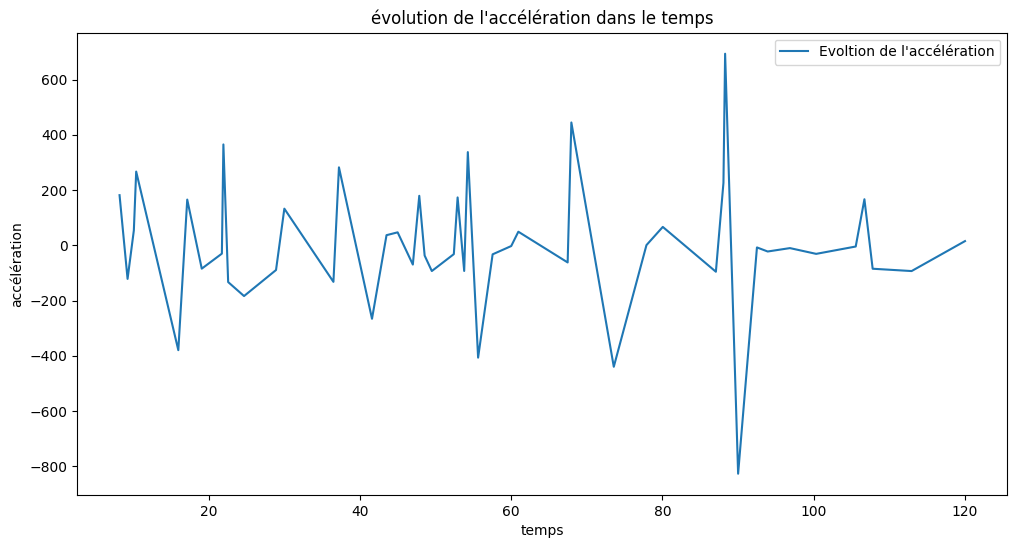

In [53]:
plt.figure(figsize=(12,6))
plt.plot(df["time_minutes"],df["accélération"])
plt.xlabel("temps")
plt.ylabel("accélération")
plt.legend(["Evoltion de l'accélération"])
plt.title("évolution de l'accélération dans le temps")